 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [377]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sbn
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [378]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv,index_col= "Date",infer_datetime_format=True,parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [379]:
# Count nulls
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [380]:
# Drop nulls
whale_df.dropna(inplace =True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [381]:
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [382]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv,index_col= "Date",infer_datetime_format=True,parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [383]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [384]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [385]:
algo_df.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [386]:
# Reading S&P 500 Closing Prices, sorting index

sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv,index_col='Date',infer_datetime_format=True,parse_dates=True)
sp500_df.sort_index(inplace = True)
sp500_df.head()

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93

In [387]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [388]:
# Fix Data Types

sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df['Close'] = sp500_df['Close'].astype('float')

sp500_df.dtypes


Close    float64
dtype: object

In [389]:
# Calculate Daily Returns

sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [390]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]

In [391]:
# Rename Column
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns.head()

S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [392]:
# Concatenate all DataFrames into a single DataFrame


combined_daily_returns = pd.concat([whale_df,algo_df,sp500_daily_returns],axis="columns",join="inner")
combined_daily_returns.sort_index(inplace=True)
combined_daily_returns.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

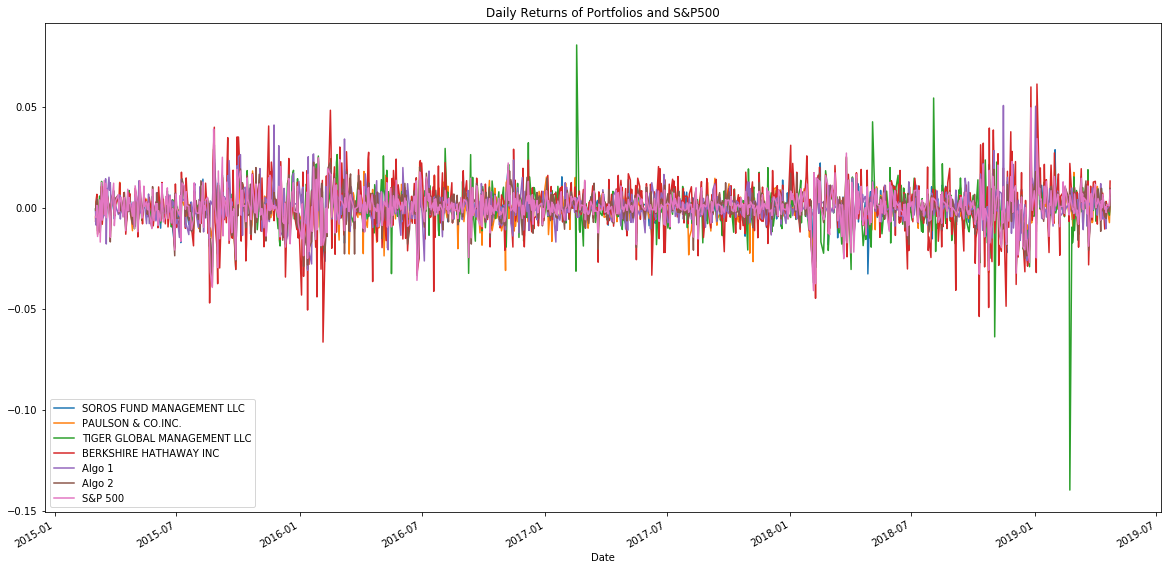

In [393]:
# Plot daily returns
combined_daily_returns.plot(figsize=(20,10), title="Daily Returns of Portfolios and S&P500")

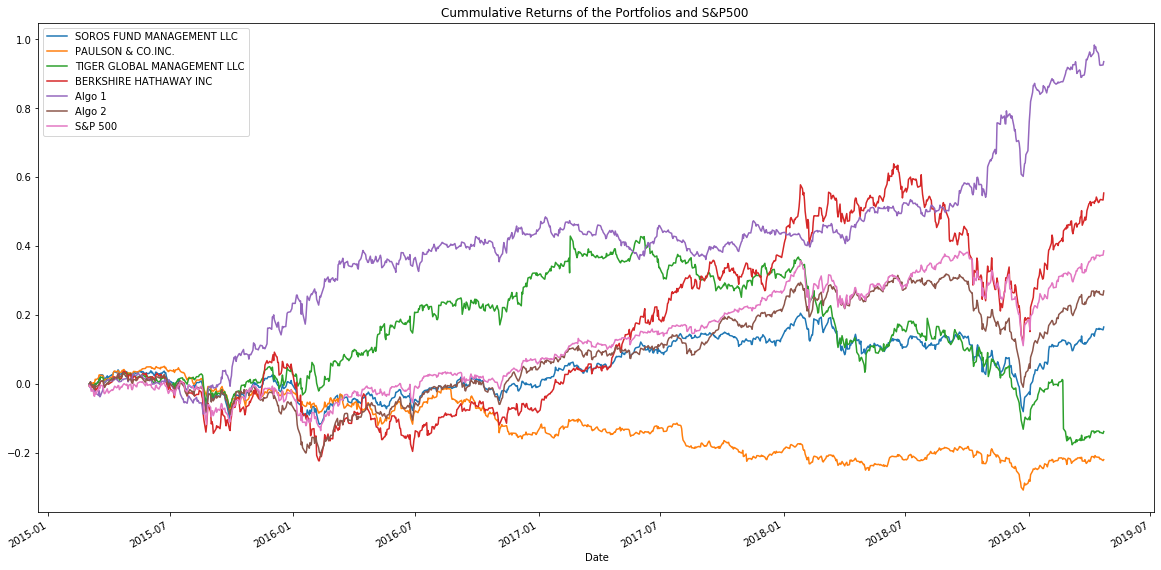

In [394]:
# Plot cumulative returns
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1
cumulative_returns.plot(figsize=(20,10), title="Cummulative Returns of the Portfolios and S&P500 ")

---
#### Conclusion: `Algo 1` & `BERKSHIRE AND HATHAWAY INC` out perform `S&P 500` over the given period
---

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

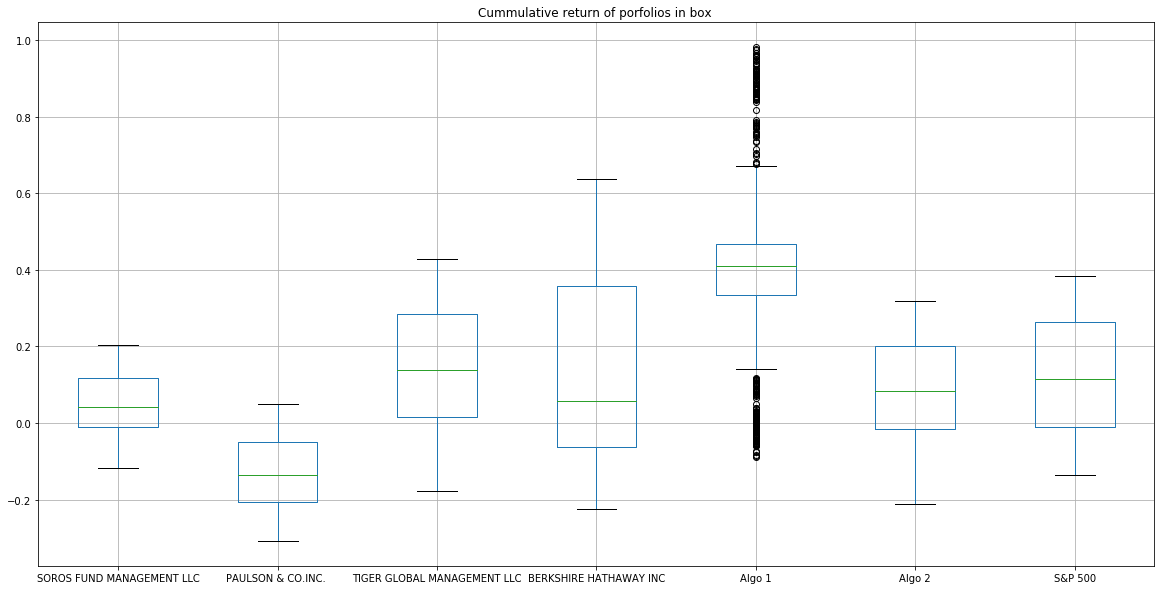

In [395]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10), grid=True, title="Cummulative return of porfolios in box " )


---
#### CONCLUSTION: If we take the outliers into consideration `Algo 1` has the largest spread. if we only consider whiskers and IQR `BIRKSHIRE HATHAWAY INC` has the largest spread. `SOROS FUND MANAGEMENT LLC` has the smallest spread
---

In [396]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
all_portfolio_std = combined_daily_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [397]:
# Determine which portfolios are riskier than the S&P 500
all_portfolio_std = all_portfolio_std.sort_values(ascending=False)
all_portfolio_std


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

---
#### CONCLUSION: From the above sorted standard deviation we derive `BERKSHIRE HATHAWAY INC` and `TIGER GLOBAL MANAGEMENT LLC` is riskier than `S&P 500`
----

In [398]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

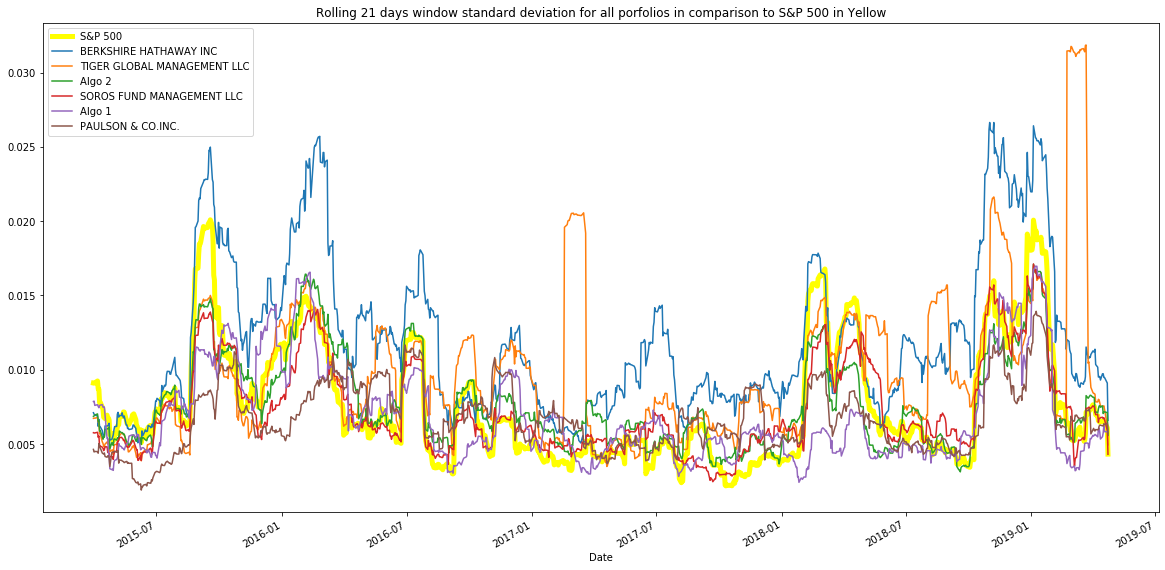

In [399]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
ax = combined_daily_returns['S&P 500'].rolling(window=21).std().plot(figsize=(20,10),lw=5, color="Yellow")

# THIS was a part of README.md for Home Work:
# Plot the rolling std of the firm's pf along with the rolling std of the S&P 500
axis=combined_daily_returns.rolling(window=21).std().plot(figsize=(20,10), y= ['BERKSHIRE HATHAWAY INC','TIGER GLOBAL MANAGEMENT LLC',
'Algo 2',
'SOROS FUND MANAGEMENT LLC',
'Algo 1',
'PAULSON & CO.INC. '], title="Rolling 21 days window standard deviation for all porfolios in comparison to S&P 500 in Yellow", ax=ax)
axis.legend()


In [400]:
# Correlation
returns_correlations = combined_daily_returns.corr()
returns_correlations

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P 500                                         0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P 500                                    0.751371  0.279494  0.858764   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
S&P 500                      1.000000

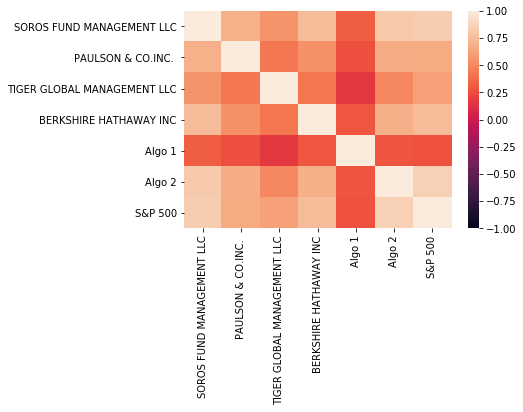

In [401]:
sbn.heatmap(returns_correlations, vmin=-1, vmax=1)

---
#### CONCLUSION: 
1. All the porfolios are positively correlation to S&P 500 though strength may differ from strong to weak, so the risk increases for each as the risk in S&P 500 increases.
2. `Algo2` and `SOROS FUND MANAGEMENT LLC` closely mimic the S&P?
---

In [402]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

(combined_daily_returns['SOROS FUND MANAGEMENT LLC'].cov(combined_daily_returns['S&P 500'])/ combined_daily_returns['S&P 500'].var())


0.7733753547794652

In [403]:
# beta for each porfolio compared to the total market 
(combined_daily_returns.cov()/ combined_daily_returns['S&P 500'].var())['S&P 500']

SOROS FUND MANAGEMENT LLC      0.773375
PAULSON & CO.INC.              0.549886
TIGER GLOBAL MANAGEMENT LLC    0.794653
BERKSHIRE HATHAWAY INC         1.134789
Algo 1                         0.248991
Algo 2                         0.837535
S&P 500                        1.000000
Name: S&P 500, dtype: float64

## Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&P 500


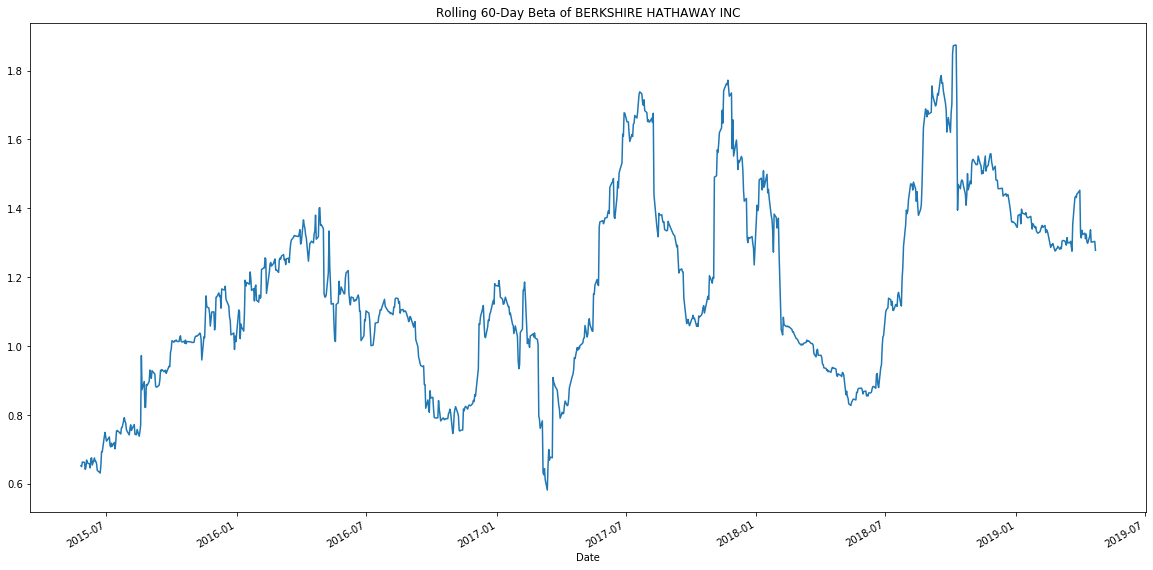

In [404]:
# Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

rolling_berkshire_covariance = combined_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_daily_returns['S&P 500'])
rolling_variance = combined_daily_returns['S&P 500'].rolling(window=60).var()
beta_rolling_berk = rolling_berkshire_covariance/rolling_variance
beta_rolling_berk.plot(figsize=(20, 10),title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')


---
#### CONCLUSION: Yes, `BERKSHIRE HATHAWAY INC` is sensitive to the S&P 500 movements as its beta > 1
---

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

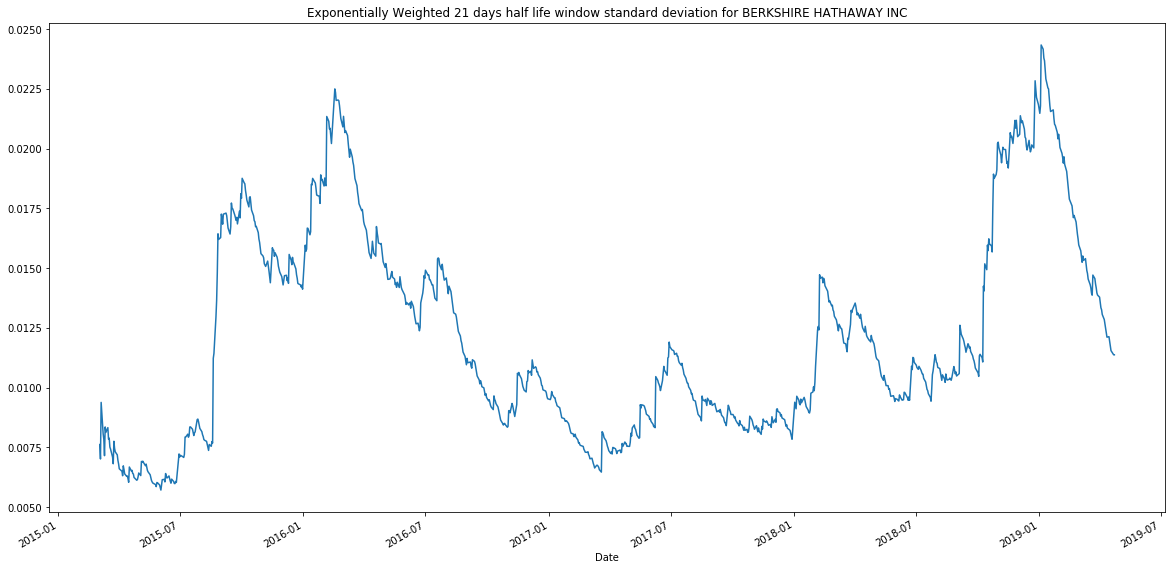

In [405]:
# (OPTIONAL)
combined_daily_returns['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted 21 days half life window standard deviation for BERKSHIRE HATHAWAY INC")


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [406]:
# Annualzied Sharpe Ratios

sharpe_ratio = (combined_daily_returns.mean() * 252) / (annualized_std)
sharpe_ratio.sort_values(ascending = False)


Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

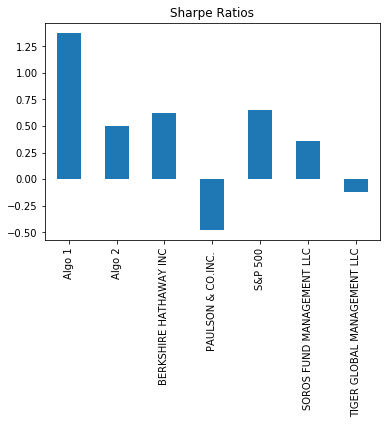

In [407]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot.bar(title='Sharpe Ratios')

---
#### CONCLUSION: `Algo 1` Outperforms the market and the Whales 
---

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [408]:
# Read the first stock
#abt_stock_data = pd.read_csv('Resources/ABT.csv', index_col='Date', infer_datetime_format=True,parse_dates=True) 
abt_stock_data = pd.read_csv('Resources/ABT.csv', index_col='Date', infer_datetime_format=True,parse_dates=True) 
abt_stock_data.index = abt_stock_data.index.normalize()
abt_stock_data.sort_index(inplace = True)
abt_stock_data.columns = ['ABT']
abt_stock_data.head()

ABT
Date             
2018-01-02  58.79
2018-01-03  58.92
2018-01-04  58.82
2018-01-05  58.99
2018-01-08  58.82

In [409]:
# Read the second stock
amzn_stock_data = pd.read_csv('Resources/AMZN.csv', index_col='Date', infer_datetime_format=True, parse_dates=True) 
amzn_stock_data.index = amzn_stock_data.index.normalize()
amzn_stock_data.sort_index(inplace=True)
amzn_stock_data.columns = ['AMZN']
amzn_stock_data.head()


AMZN
Date               
2018-01-02  1189.01
2018-01-03  1204.20
2018-01-04  1209.59
2018-01-05  1229.14
2018-01-08  1246.87

In [410]:
# Read the third stock
fico_stock_data = pd.read_csv('Resources/FICO.csv', index_col='Date', infer_datetime_format=True,parse_dates=True) 
fico_stock_data.index = fico_stock_data.index.normalize()
fico_stock_data.sort_index(inplace = True)
fico_stock_data.columns = ['FICO']
fico_stock_data.head()

FICO
Date              
2018-01-02  153.39
2018-01-03  153.43
2018-01-04  155.18
2018-01-05  156.92
2018-01-08  158.86

In [411]:
# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat([abt_stock_data,amzn_stock_data,fico_stock_data],axis="columns", join="inner")
my_portfolio

ABT     AMZN    FICO
Date                              
2018-01-02  58.79  1189.01  153.39
2018-01-03  58.92  1204.20  153.43
2018-01-04  58.82  1209.59  155.18
2018-01-05  58.99  1229.14  156.92
2018-01-08  58.82  1246.87  158.86
...           ...      ...     ...
2019-04-10  78.97  1847.33  276.31
2019-04-11  78.51  1844.07  279.34
2019-04-12  78.01  1843.06  279.11
2019-04-15  77.50  1844.87  278.23
2019-04-16  76.38  1863.04  283.39

[324 rows x 3 columns]

In [412]:
# Reset the index

#<--we don't need to reset the index as the concat axis is column and not row

my_portfolio.sort_index(inplace=True) 
my_portfolio


ABT     AMZN    FICO
Date                              
2018-01-02  58.79  1189.01  153.39
2018-01-03  58.92  1204.20  153.43
2018-01-04  58.82  1209.59  155.18
2018-01-05  58.99  1229.14  156.92
2018-01-08  58.82  1246.87  158.86
...           ...      ...     ...
2019-04-10  78.97  1847.33  276.31
2019-04-11  78.51  1844.07  279.34
2019-04-12  78.01  1843.06  279.11
2019-04-15  77.50  1844.87  278.23
2019-04-16  76.38  1863.04  283.39

[324 rows x 3 columns]

In [413]:
# Drop Nulls
my_portfolio.dropna(inplace = True)
my_portfolio.isna().sum()

ABT     0
AMZN    0
FICO    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [414]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

my_daily_returns = my_portfolio.pct_change()
my_daily_returns.head()


portfolio_returns = my_daily_returns.dot(weights)
portfolio_returns.head()


Date
2018-01-02         NaN
2018-01-03    0.005082
2018-01-04    0.004728
2018-01-05    0.010088
2018-01-08    0.007969
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [415]:
all_pf_returns = pd.concat([combined_daily_returns,portfolio_returns],axis="columns", join="inner")

# renaming the my_porfolio
all_pf_returns.rename(columns ={0:"JEDI PORTFOLIO"}, inplace=True)
all_pf_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-02                   0.014546            0.015045   
2018-01-03                   0.004658            0.000027   
2018-01-04                  -0.000914            0.004196   
2018-01-05                   0.004072            0.000823   
2018-01-08                   0.004473           -0.003739   
...                               ...                 ...   
2019-04-10                   0.009808            0.008366   
2019-04-11                   0.003406           -0.003959   
2019-04-12                   0.005663           -0.001165   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-02                    -0.004784                0.031017  0.001254   
2018-01-03                     0.001979                0.005676 -0.000890   
2018-01-04                     0.010743                0.004065 -0.000914   
2018-01-05                     0.000737                0.022023 -0.003839   
2018-01-08                     0.005085                0.003435  0.001653   
...                                 ...                     ...       ...   
2019-04-10                     0.002912                0.005269 -0.004221   
2019-04-11                    -0.000637               -0.000496  0.001705   
2019-04-12                     0.004217                0.007316 -0.005501   
2019-04-15                     0.000398               -0.010492 -0.004331   
2019-04-16                    -0.000831                0.000837 -0.006945   

              Algo 2   S&P 500  JEDI PORTFOLIO  
Date                                            
2018-01-02  0.017222  0.008303             NaN  
2018-01-03  0.008175  0.006399        0.005082  
2018-01-04  0.004294  0.004029        0.004728  
2018-01-05  0.006405  0.007034        0.010088  
2018-01-08  0.000658  0.001662        0.007969  
...              ...       ...             ...  
2019-04-10  0.009632  0.003478        0.003986  
2019-04-11 -0.001568  0.000038        0.001125  
2019-04-12  0.004504  0.006609       -0.002580  
2019-04-15 -0.004572 -0.000629       -0.002903  
2019-04-16  0.002899  0.000509        0.004648  

[324 rows x 8 columns]

In [416]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_pf_returns.dropna(inplace=True)
all_pf_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
JEDI PORTFOLIO                 0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

---
### Perfomance
---

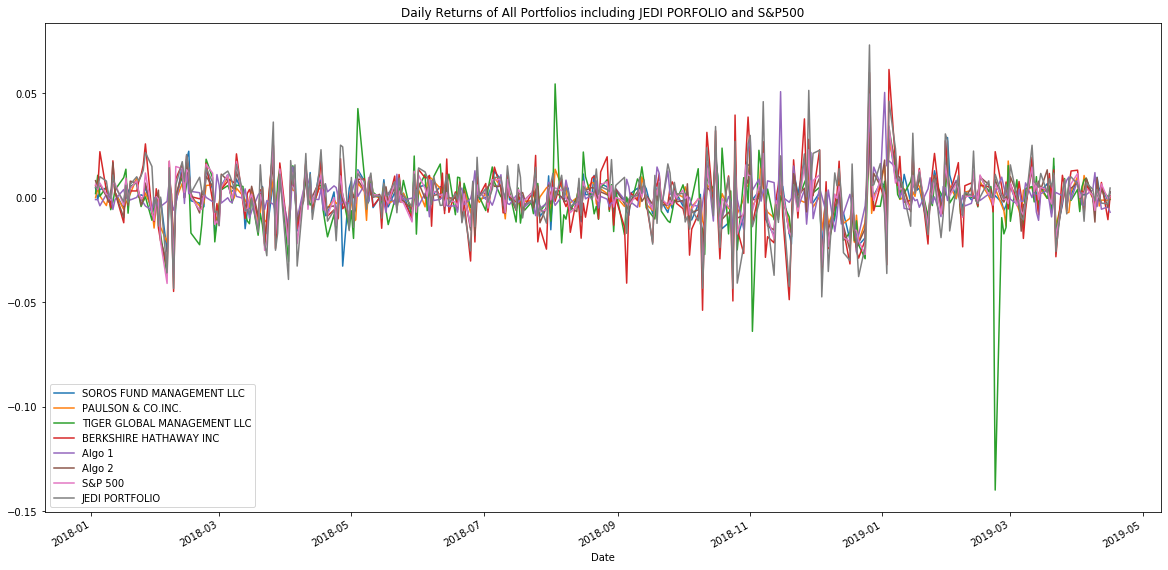

In [417]:
# Plot daily returns
all_pf_returns.plot(figsize=(20,10), title="Daily Returns of All Portfolios including JEDI PORFOLIO and S&P500")

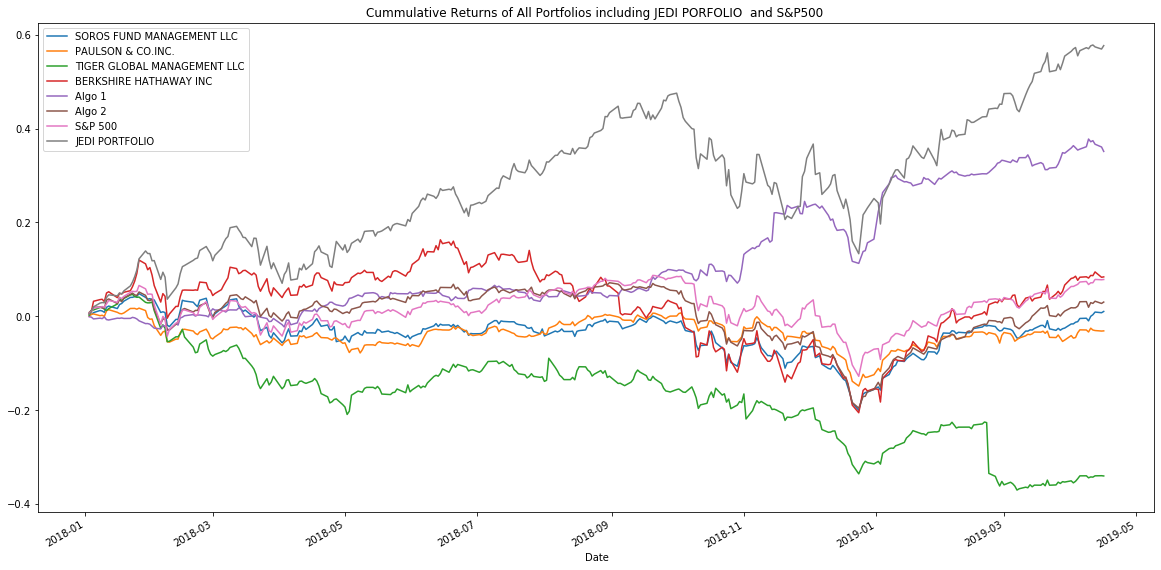

In [418]:
cumulative_pf_returns = (1 + all_pf_returns).cumprod() - 1
cumulative_pf_returns.plot(figsize=(20,10), title="Cummulative Returns of All Portfolios including JEDI PORFOLIO  and S&P500 ")

---
### Risk
---

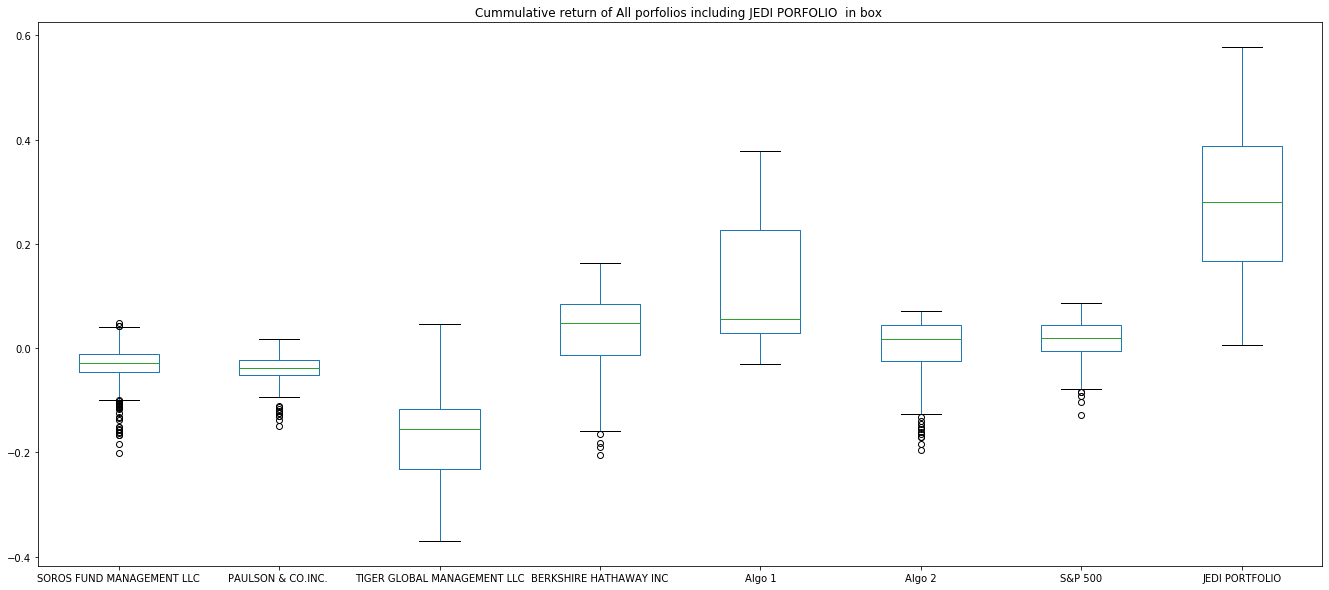

In [419]:
# Box plot to visually show risk
cumulative_pf_returns.plot.box(figsize=(23,10), title="Cummulative return of All porfolios including JEDI PORFOLIO  in box " )

---
#### CONCLUSION: `JEDI PORFOLIO` has the largest spread of returns

---
### Rolling
---

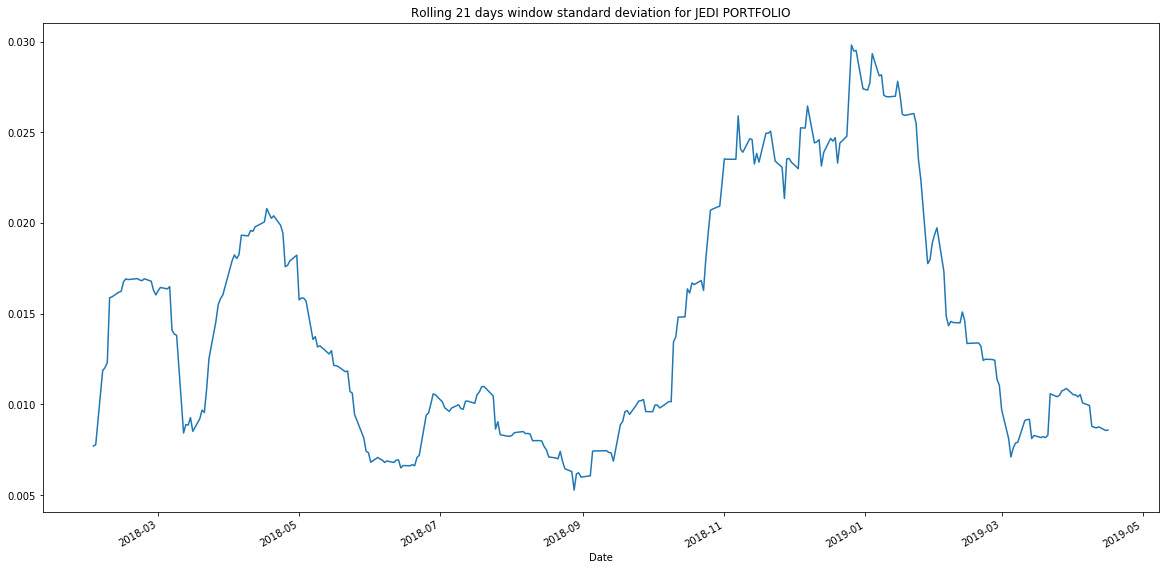

In [420]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
ax = all_pf_returns['JEDI PORTFOLIO'].rolling(window=21).std().plot(figsize=(20,10), title="Rolling 21 days window standard deviation for JEDI PORTFOLIO")

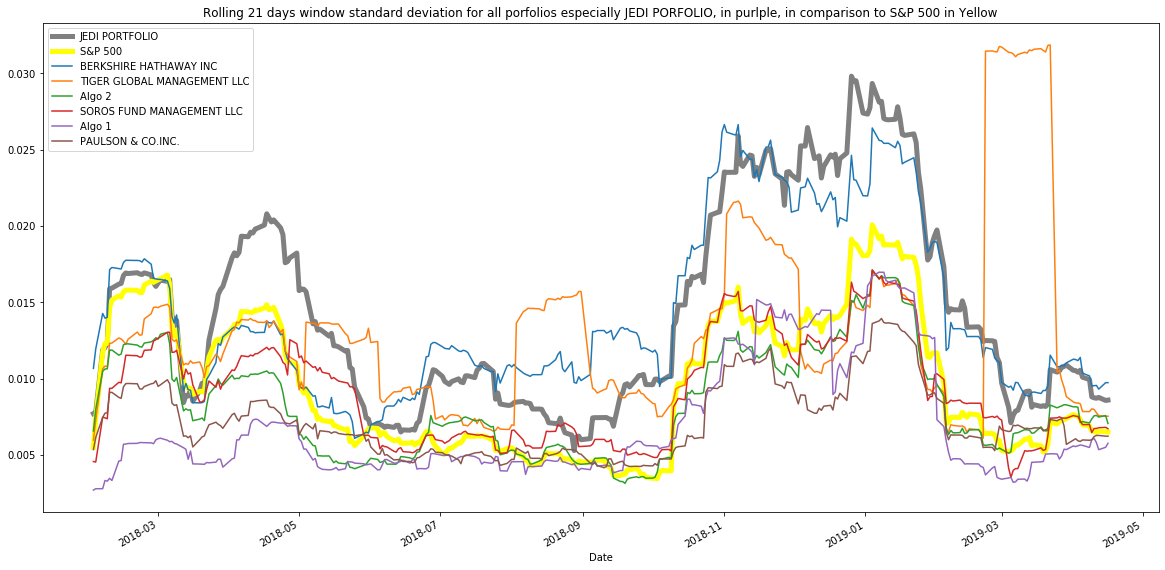

In [421]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
jedi_ax = all_pf_returns[['JEDI PORTFOLIO','S&P 500']].rolling(window=21).std().plot(figsize=(20,10),lw=5,color=["Grey","Yellow"])


axis_all=all_pf_returns.rolling(window=21).std().plot(figsize=(20,10), y= ['BERKSHIRE HATHAWAY INC','TIGER GLOBAL MANAGEMENT LLC',
'Algo 2',
'SOROS FUND MANAGEMENT LLC',
'Algo 1',
'PAULSON & CO.INC. '], title="Rolling 21 days window standard deviation for all porfolios especially JEDI PORFOLIO, in purlple, in comparison to S&P 500 in Yellow", ax=jedi_ax)
#axis_all.legend()



In [422]:
# Beta

beta_of_all_pf = (all_pf_returns.cov()/ all_pf_returns['S&P 500'].var())['S&P 500']
beta_of_all_pf.sort_values(ascending = False)

JEDI PORTFOLIO                 1.306285
BERKSHIRE HATHAWAY INC         1.220902
S&P 500                        1.000000
SOROS FUND MANAGEMENT LLC      0.791969
TIGER GLOBAL MANAGEMENT LLC    0.780590
Algo 2                         0.769495
PAULSON & CO.INC.              0.573518
Algo 1                         0.209901
Name: S&P 500, dtype: float64

---
#### CONCLUSION:`JEDI PORTFOLIO` is the most volatile porfolio in relation to the market
---

---
### Annualzied Sharpe Ratios
---

In [423]:

all_pf_std = all_pf_returns.std()
all_pf_std

# Determine which portfolios are riskier than the S&P 500
all_pf_std = all_pf_std.sort_values(ascending=False)
all_pf_std

JEDI PORTFOLIO                 0.015217
BERKSHIRE HATHAWAY INC         0.014798
TIGER GLOBAL MANAGEMENT LLC    0.014101
S&P 500                        0.010226
SOROS FUND MANAGEMENT LLC      0.009534
Algo 2                         0.008869
Algo 1                         0.007688
PAULSON & CO.INC.              0.007406
dtype: float64

In [424]:
# Calculate the annualized standard deviation (252 trading days)
annualized_pf_std = all_pf_std * np.sqrt(252)
annualized_pf_std.sort_values(ascending=False)

JEDI PORTFOLIO                 0.241565
BERKSHIRE HATHAWAY INC         0.234917
TIGER GLOBAL MANAGEMENT LLC    0.223844
S&P 500                        0.162326
SOROS FUND MANAGEMENT LLC      0.151341
Algo 2                         0.140792
Algo 1                         0.122041
PAULSON & CO.INC.              0.117573
dtype: float64

In [425]:
# Annualized Sharpe Ratios:
all_pf_sharpe_ratio = (all_pf_returns.mean() * 252) / (annualized_pf_std)
all_pf_sharpe_ratio.sort_values(ascending = False)

Algo 1                         1.985521
JEDI PORTFOLIO                 1.592174
S&P 500                        0.443786
BERKSHIRE HATHAWAY INC         0.385111
Algo 2                         0.236039
SOROS FUND MANAGEMENT LLC      0.128397
PAULSON & CO.INC.             -0.150890
TIGER GLOBAL MANAGEMENT LLC   -1.333129
dtype: float64

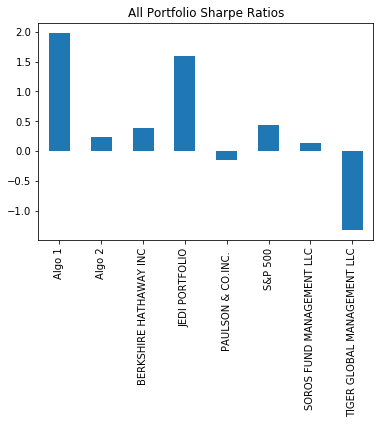

In [426]:
# Visualize the sharpe ratios as a bar plot
all_pf_sharpe_ratio.plot.bar(title='All Portfolio Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [427]:
returns_correlations = all_pf_returns.corr()
returns_correlations

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.776899   
PAULSON & CO.INC.                             0.776899            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.528044            0.537881   
BERKSHIRE HATHAWAY INC                        0.794583            0.666122   
Algo 1                                        0.329669            0.339599   
Algo 2                                        0.840619            0.805662   
S&P 500                                       0.849453            0.791820   
JEDI PORTFOLIO                                0.752886            0.675985   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.528044   
PAULSON & CO.INC.                               0.537881   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.389890   
Algo 1                                          0.143119   
Algo 2                                          0.488744   
S&P 500                                         0.566064   
JEDI PORTFOLIO                                  0.436753   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.794583  0.329669  0.840619   
PAULSON & CO.INC.                          0.666122  0.339599  0.805662   
TIGER GLOBAL MANAGEMENT LLC                0.389890  0.143119  0.488744   
BERKSHIRE HATHAWAY INC                     1.000000  0.317960  0.794194   
Algo 1                                     0.317960  1.000000  0.338884   
Algo 2                                     0.794194  0.338884  1.000000   
S&P 500                                    0.843638  0.279190  0.887187   
JEDI PORTFOLIO                             0.844676  0.282115  0.799139   

                              S&P 500  JEDI PORTFOLIO  
SOROS FUND MANAGEMENT LLC    0.849453        0.752886  
PAULSON & CO.INC.            0.791820        0.675985  
TIGER GLOBAL MANAGEMENT LLC  0.566064        0.436753  
BERKSHIRE HATHAWAY INC       0.843638        0.844676  
Algo 1                       0.279190        0.282115  
Algo 2                       0.887187        0.799139  
S&P 500                      1.000000        0.877794  
JEDI PORTFOLIO               0.877794        1.000000

In [428]:
# How Jedi PF is correlated to the rest of the porfolios
returns_correlations['JEDI PORTFOLIO'].sort_values(ascending = False)

JEDI PORTFOLIO                 1.000000
S&P 500                        0.877794
BERKSHIRE HATHAWAY INC         0.844676
Algo 2                         0.799139
SOROS FUND MANAGEMENT LLC      0.752886
PAULSON & CO.INC.              0.675985
TIGER GLOBAL MANAGEMENT LLC    0.436753
Algo 1                         0.282115
Name: JEDI PORTFOLIO, dtype: float64

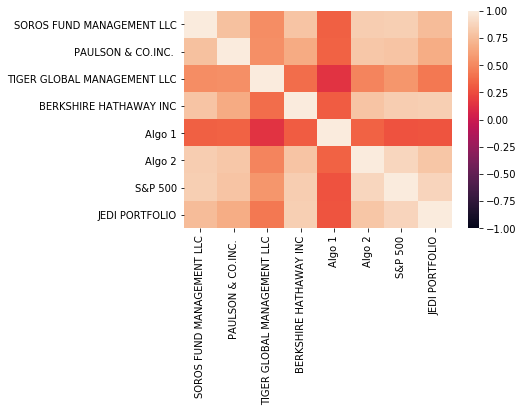

In [429]:
sbn.heatmap(returns_correlations, vmin=-1, vmax=1)

#### `JEDI PORFOLIO` is high positive correlation to `S&P 500` & `BIRKSHIRE HATHAWAY` and has a very low correlation with `Algo 1`

---
### OBSERVATION: `JEDI PORTFOLIO` is risker than other porfolios and is more sensitive to market volatility as it has higher beta. However, since it has higher sharpe ratio, it has higher return for the risk assumed. It is also very highly correlation with one of whale porfolios: `BIRKSHIRE HATHAWAY INC`
---